In [1]:
import torch, detectron2
!nvcc --version
print("torch: ", torch.__version__)
print("detectron2:", detectron2.__version__)

#set CUDA to GPU 3 for Pytorch
torch.cuda.set_device(3)
device_name = torch.cuda.get_device_name()
device_number = torch.cuda.current_device()
print("Pytorch using GPU Type: ", device_name, device_number)

from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from matplotlib import pyplot as plt
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# #set CUDA to GPU 3 for Detectron2
# os.environ["CUDA_VISIBLE_DEVICES"] = "3"
# os.environ["NVIDIA_VISIBLE_DEVICES"] = "3"

/home/akhalid-local/anaconda3/envs/oln/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_May__3_18:49:52_PDT_2022
Cuda compilation tools, release 11.7, V11.7.64
Build cuda_11.7.r11.7/compiler.31294372_0
torch:  1.12.0
detectron2: 0.6
Pytorch using GPU Type:  NVIDIA GeForce GTX 1080 Ti 3


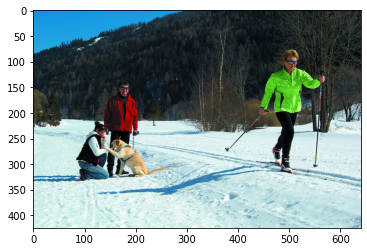

In [2]:
# get one input image of a kitchen: 
# !wget http://farm3.staticflickr.com/2516/3732374801_430e243a8e_z.jpg -q -O input_img.jpg
image = cv2.imread("/data/general/coco/train2017/000000144862.jpg")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [3]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

/home/akhalid-local/anaconda3/envs/oln/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1656352645774/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


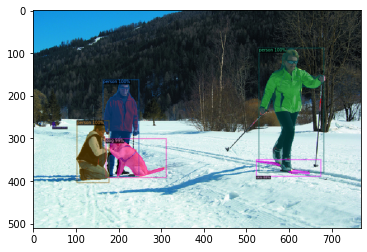

In [15]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(rgb_image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])


In [16]:
print(cfg.DATASETS.TRAIN[0])

coco_2017_train
